<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# GRC: Segmentation d'une clientèle bancaire en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a>

**Résumé**
Analyse de données extraites d'un recensement aux USA de 1994. Préparation des données, exploration élémentaire et multidimensionnelle ([ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)), [classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf). L'objectif est de préparer l'[étape suivante](https://github.com/wikistat/Apprentissage/tree/master/Adult-Census) consistant à modéliser / prévoir le niveau de revenu.

## Introduction
### Objectif
A refaire

### Présentation des données
#### Les variables

Num| Libellé |	Ensemble de valeurs
-|--|--|--
1|`Age`|	real
2|	`workClass`|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
3|	`fnlwgt`|	real
4|	`education`|	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
5|	`educNum`|	integer
6|	`mariStat`|	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
7|	`occup`|	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
8|	`relationship`|	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
9|	`origEthn`|	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
10|	`sex`|	Female, Male
11|	`capitalGain`|	real  
12|	`capitalLoss`|	real
13|	`hoursWeek`|	real
14|	`nativCountry`|	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
15|	`income`|		>50K, <=50K



# <FONT COLOR="Red">Épisode 1 <i>Data Munging </i></font> 
## Lecture et prétraitement  des données
Les données sont disponibles dans le répertoire de ce calepin et chargées en même temps.

Même si les données sont déjà extraites par échantillonnage d'une très grande base, elles nécessitent un travail prémiminaire (*data munging*) pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables.  Ce travail préliminaire, souvent long et fastidieux, nécessite d'y consacer beaucoup de temps et de rigueur afin de s'assurer de la qualité finale des résultats. 

Il fait appel à des outils classiques de statistique descriptive. 

Les données sont anonymisées et datent du siècle dernier, elles n'ont plus d'intérêt "commercial". De façon générale, plutôt que de conserver tous les fichiers de données intermédiaires à une étude, ce qui peut nécessiter beaucoup d'espace disque, il est important, voire crucial, d'archiver *tous* les programmes intermédiaires de saisie, sélection, transformation des données. En effet, en cas de problème ou même simplement d'un mauvais choix méthodologique, il faut pouvoir rapidement repartir d'une étape précédente. 

La production d'un calepin aide à cette mémoire lors de l'analyse préliminaire mais ne constitue pas un code opérationnel.

### Lecture des données

In [154]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [155]:
path=""
adult = pd.read_table(path + 'adultCensus.csv', sep=',', header=0, index_col=None)
idx = pd.Int64Index(range(adult.shape[0]))
names = list(adult)
adult = pd.DataFrame(index = idx, data = adult, columns=names)
adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,incLow,7.684784,0.0,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,incLow,0.000000,0.0,Ag4,HW1
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,incLow,0.000000,0.0,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,incLow,0.000000,0.0,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,incLow,0.000000,0.0,Ag2,HW2


Toutes les colonnes ont bien été importée, la première correspond à un identifiant unique pour chaque personne recensée. Si on oublie de le définir, une des autres colonnes est utilisée par défaut pour servir d'identifiant.

In [156]:
adult.describe()

,age,fnlwgt,educNum,hoursWeek,LcapitalGain,LcapitalLoss
count,29825.000000,2.982500e+04,29825.000000,29825.000000,29825.000000,29825.000000
mean,38.676144,1.898787e+05,10.159430,41.157351,0.750215,0.356503
std,13.012291,1.057528e+05,2.536119,11.808849,2.481184,1.597815
min,18.000000,1.376900e+04,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.176270e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.784870e+05,10.000000,40.000000,0.000000,0.000000
75%,47.000000,2.376710e+05,13.000000,45.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,11.512925,8.379539


Aucune donnée n'est manquante, on observe pas non plus de résultat aberrant à première vue.

On va à présent préparer les données en commençant par affecter le bon type aux variables qualitatives.

Une fonction permet de définir le bon type "categorical" des variables qualitatives  en utilisant un dictionnaire des modalités pour le recodage.

In [157]:
# Ici les noms des variables sont suffisamment explicites, il n'est pas utile de les renommer.
def create_categorical_data(df, column_name) :  # , cat_name_dic
    cat_columns = pd.Categorical(df[column_name], ordered=False)
    #new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns  # .rename_categories(new_categorie)

In [160]:
for var_qual in ["workClass", "education", "occup", "relationship", "sex", "nativCountry", "origEthn", "mariStat", "capitalGain", "capitalLoss", "income", "ageQ", "hoursWeekQ"] :
    adult[var_qual] = create_categorical_data(adult, var_qual)

## 2 Description
**Q** Quelle est la population étudiée ? Quel est l’échantillon ?

In [163]:
print(adult.shape)

(29825, 19)


On étudie les résultats d'un recensement portant sur 29825 adultes américains.

**Q** Commenter, justifier les différentes transformations opérées. Repérer les variables quantitatives, qualitatives. Certaines (`age`, `hoursWeek`) sont présentes sous les deux types. Beaucoup de modalités on déjà été regroupées, notamment celles de `nativCountry` (voir le programme) certaines variables sont rendues qualitatives (`capitalLoss` ou `Gain`).

Les modalités des variables `mariStat`, `nativCountry`, `education`, `workClass`, `occup` et `origin` ont été regroupées. 

Deux nouvelles variables `LcapitalGain` et `LcapitalLoss` sont créées et valent respectivement $\log (1 + capitalGain)$ et $\log (1 + capitalLoss)$.

Les deux variables `capitalGain` et `capitalLoss` sont rendues qualitatives et valent None, Low ou High suivant si elles sont négatives, inférieures à leur médiane ou supérieures.


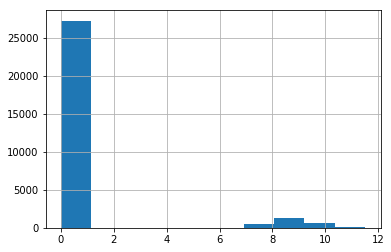

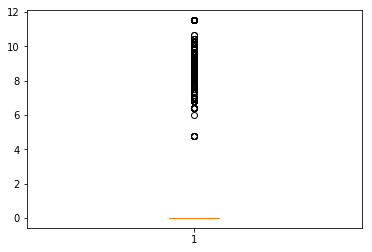

In [73]:
adult["LcapitalGain"].hist()
plt.show()
adult["capitalGain"].dtype
plt.boxplot(adult["LcapitalGain"])
plt.show()

**Q** Quels sont ces graphiques? Que dire de la transformation  opérée ? La variable CapitalLoss subit le même traitement.

Ces deux graphiques sont un histogramme et un boxplot de la variable `LcapitalGain`. La transformation permet de bien séparer les valeurs à None des autres. Cependant les deux modalités Low et High ne sont pas séparées sur ces graphiques. On remarque que la modalité None est très majoritaire dans l'échantillon.

In [76]:
adult["capitalGain"].describe()

count     29825
unique        3
top        None
freq      27295
Name: capitalGain, dtype: object

Certains couples de variables posent des problèmes. 

In [102]:
print(adult.groupby(["relationship", "sex"]).size())
print()
print(adult.groupby(["education", "educNum"]).size())
print()
print(adult.groupby(["mariStat", "relationship"]).size())
print()
print(adult.groupby(["origEthn", "nativCountry"]).size())

relationship    sex   
Husband         Female        1
                Male      12459
Not-in-family   Female     3563
                Male       4150
Other-relative  Female      379
                Male        493
Own-child       Female     1825
                Male       2343
Unmarried       Female     2459
                Male        747
Wife            Female     1405
                Male          1
dtype: int64

education    educNum
Associates   11         1307
             12         1008
Bachelors    13         5043
Doctorate    16          375
Dropout      1            45
             2           151
             3           287
             4           554
             5           432
             6           714
             7           894
             8           344
HS-Graduate  10         6674
HS-grad      9          9829
Masters      14         1626
Prof-School  15          542
dtype: int64

mariStat       relationship  
Married        Husband           12460
           

**Q** Quel est ce problème général ? Qu’est-ce qui va se passer si on en calcule l’analyse des correspondances ? Quel est le problème plus spécifique des variables `relationship` et `sex`?

Le problème est que les informations apportées par ces couples de variables sont souvent redondantes. 

Il va se passer quoi ? 

Les valeurs Wife et Husband de la variable `relationship` portent déjà l'information de la variable `sex`. On remarque d'ailleurs une probable erreur de saisie avec un homme marqué Wife et une femme Husband.  (Faut la corriger, la supprimer ? En tout cas on peut les retrouver comme ça, y'a plus qu'à voir ce qu'on en fait)

In [171]:
adult[(adult["relationship"]  == "Husband") & (adult["sex"] == "Female")]

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
6489,34,Private,175878,HS-grad,9,Married,Sales,Husband,White,Female,None,None,40,United-States,incLow,0.0,0.0,Ag3,HW2


In [172]:
adult[(adult["relationship"]  == "Wife") & (adult["sex"] == "Male")]

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
521,29,Private,350162,Bachelors,13,Married,White-Collar,Wife,White,Male,None,None,40,United-States,incHigh,0.0,0.0,Ag2,HW2


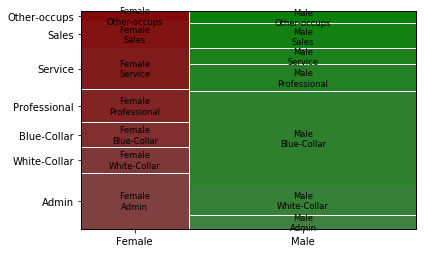

In [104]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(adult, ["sex", "occup"])
plt.show()

**Q** Quel graphique ci-dessus?  Quelle interprétation ? Quel est le test ci-dessous ? Que doit vérifier la table pour que ce test soit valide ? Quelle est l’hypothèse H0 testée ? Conclusion.

Ce graphique est un mosaic plot de la variable `occup` en fonction de la variable `sex`. On observe que la variable `sex` est un facteur qui influe sur le type d'emploi occupé, en effet les emplois administratifs et de service représentent une part beaucoup plus ilmportante chez les femmes que chez les hommes. A l'inverse, la catégorie Blue COllar est sur-représentée chez les hommes.

Le test ci-dessous est un test du Chi-deux, mais aucune idée de à quoi il sert.

In [105]:
# Traduire chisq.test(table(dataBase[,"sex"],dataBase[,"occup"]))

**Q** Quel est le graphique ci-dessous? Comment interpréter? Quel test permettrait de confirmer ? Que dire de l’intérêt de cette variable [fnlwgt](http://web.cs.wpi.edu/~cs4341/C00/Projects/fnlwgt) (Final sampling weight)?

Ce graphique est un boxplot de la variable `fnlwgt` en fonction de `income`. On observe que les personnes aux revenus plus faibles ont plus souvent un `fnlwgt` élevé. Cependant, les différents quantiles sont quasiment identiques pour les deux modalités de `income`. On pourrait réaliser un test d'indépendance du Chi-deux pour le vérifier.

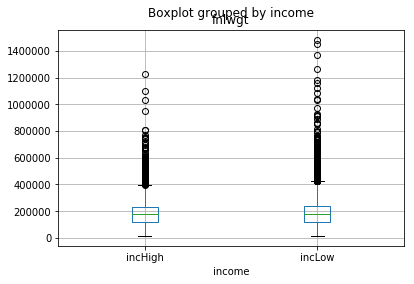

In [141]:
adult.boxplot(column="fnlwgt", by="income")
plt.show()

In [145]:
tab = pd.crosstab(index=adult["fnlwgt"], columns=adult["income"])
print(tab)

# Donne pas grand chose, on pourrait peut-être regrouper par classes ou faire un test sur les quantiles de fnlwgt pour 
# voir s'ils bougent en fonction de income ?


income   incHigh  incLow
fnlwgt                  
13769          0       1
14878          1       0
18827          0       1
19214          0       1
19302          3       2
19395          0       2
19410          0       1
19491          0       1
19520          0       1
19700          1       0
19847          0       2
19899          1       0
19914          1       3
20057          0       2
20098          0       1
20101          0       1
20109          0       1
20179          1       0
20296          1       0
20308          0       1
20323          0       1
20333          1       0
20438          0       1
20469          0       1
20507          1       0
20511          0       1
20534          1       2
20676          0       1
20728          0       1
20795          3       1
...          ...     ...
761006         0       1
766115         0       1
767403         1       0
791084         0       1
795830         0       1
799281         0       1
806552         1       0


**Q** Que dire dans la figure ci-dessous de la liaison entre les variables `educNum` et `age` et de la localisation des points noirs (>50k€) par rapport aux rouges (<50k€) ?

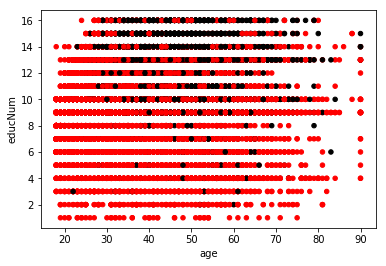

In [153]:
# plot(dataBase[,"age"],dataBase[,"educNum"],col=as.integer(dataBase[,"income"]),pch=16,cex=0.5)

col = adult["income"].map({"incHigh":'black', "incLow":'r'})
adult.plot.scatter(x="age", y="educNum", c=col)
plt.show()

On observe que les hauts revenus correspondent généralement aux personnes avec un haut niveau d'éducation et ayant entre 35 et 65 ans.

## 3 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)
**Q** Que représente la figure ci-dessous? 

In [174]:
# nrow(as.vector(table(dataBase[,"age"],dataBase[,"educNum"])))

# Donne rien sur Rstudio, à tester à l'INSA

**Q** Quelle est le graphe ci-dessous? Quel est le cercle?  A quoi sert-il ?

Ce graphe est la carte factorielle associée aux deux premières composantes de l'ACP. Elle permet de visualiser à quel axe contribue chaque variable. (moyen sûr, à vérifier).

Le cercle des corrélations permet de voir à quel point les variables sont bien représentées sur les deux plans factoriels, plus la flèche est proche du cercle plus la variable est bien représentée.

In [214]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# définition de la commande
pca = PCA()
# Liste des variables quantitatives
quantit = [name for name in list(adult) if adult[name].dtype.name != "category"]
# Sélection des variables quantitatives
dat = adult[quantit]
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
C = pca.fit(data).transform(data)

C:\Users\paul-\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


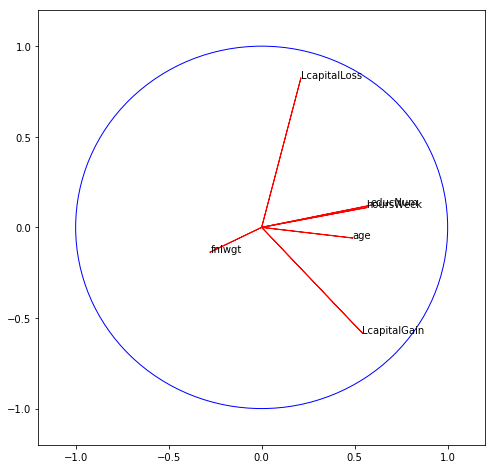

In [215]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

**Q** La représentation ci-dessous montre un artefact avec 3 paquets d’individus. A quoi est dû cet artéfact ? Est-il utile à la compréhension des données ? 

Hélas y'a pas le modèle sur Visa, va falloir se débrouiller sans copier-coller.



### Desciption univariée et bivariée

In [ ]:
# Moyennes
visaprem=visaraw
visaprem.mean()

**Q** Quel problème révèle la distribution ci-dessous de la variable  « ancienneté dans la banque », exprimée en mois?

In [ ]:
visaprem["RELAT"].hist(bins=20)
plt.show()

**Q** Que dire de la distribution de la variable ci-dessous? Quelle transformaiton proposer?

In [ ]:
visaprem["TAVEP"].hist(bins=20)
plt.show()

In [ ]:
visaprem["QSMOY"].hist(bins=20)
plt.show()

In [ ]:
import scipy.stats as stats
stats.probplot(visaprem["QSMOY"], dist="norm", plot=plt)

**Q**  Quel problème pose les deux variables ci-dessous? Quelle correction proposer?

In [ ]:
visaprem["PCSPQ"].value_counts()

In [ ]:
visaprem["FAMIQ"].value_counts()

**Q** Quel est le graphe ci-dessous? Les variables vous semblent-elles liées?

In [ ]:
visaprem.boxplot('QSMOY','CARVP')
plt.show()

La moyenne des soldes moyens sur trois mois `QSMOY` pose un problème mais elle semble peu discriminante, elle est conservée en l'état. Sinon une transformation par la fonction "argument sinus hyperbolique" peut être utilisée avec ce type de distribution mais ce n'est pas indispensable.

**Q** Que représente le graphique ci-dessous? Interprétation en quelques lignes. Ces variables semblent-elles liées ? 

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
visaprem["SEXEQ"]=visaprem["SEXEQ"].cat.remove_unused_categories()
table=pd.crosstab(visaprem["SEXEQ"],visaprem["CARVP"])
print(table)
mosaic(table.stack())
plt.show()

**Q** Quel problème révèle le tableau ci-dessous? Comment le régler?

In [ ]:
table=pd.crosstab(visaprem["NTCAS"],visaprem["CARVP"])
print(table)

**Q** Ce graphique représente la variable « ancienneté dans la banque », exprimée en mois, en fonction de l’âge du client en années. Quelle incohérence montre ce graphique ? Quelles en est la raison?.

In [ ]:
visaprem.plot('AGER','RELAT',kind='scatter')
plt.show()

**Q** Quel problème révèle le tableau ci-dessous? Comment le résoudre?

In [ ]:
table=pd.crosstab(visaprem["NTCAS"],visaprem["ZOCNB"].isnull())
print(table)

In [ ]:
#Transformations des variables 
## regroupements de modalités
visatrans=visaprem
FAMIQ_DIC = {"Fmar":'Fcou',"Fuli":'Fcou',"Fdiv":'Fseu','Fveu':'Fseu',
                        "Fsep":'Fseu',"Fcel":'Fseu'}
PCSPQ_DIC = {"Pagr":"Pint",'Part':"Pint","Pret":"Psan","Pinc":"Psan"}
# attention de bien gétrer le type des variables
visatrans["PCSPQ"]=pd.Categorical(visatrans["PCSPQ"].astype(str).replace(PCSPQ_DIC),ordered=False)
visatrans["FAMIQ"]=visatrans["FAMIQ"].astype(str).replace(FAMIQ_DIC)

In [ ]:
# complétion de valeurs
visatrans["ZOCNB"].fillna(0, inplace=True)
visatrans["ZOCNB"]
visatrans = visatrans[visatrans.DMVTP.notnull()]
# Correction ancienneté relation
visatrans["RELAT"]= [x-720 if x>600 else x for x in visatrans["RELAT"]]

In [ ]:
# log des variables de distribution dissymétrique 
def log1(x):
    return np.log(1+x)
listeVarLog=['OPGNB','MOYRV','TAVEP','ENDET','GAGET','GAGEC',
'GAGEM','QCRED','DMVTP','BOPPN','FACAN','LGAGT',
'VIEMT','XLGMT','YLVMT','ITAVC','HAVEF','JNBJD']
visatrans[listeVarLog]=log1(visatrans[listeVarLog])
visatrans["ZOCNB"]=np.sqrt(visatrans["ZOCNB"])

**Vérifier** les distributions des variables transformées.

In [ ]:
visatrans2 = visatrans[["SEXEQ","AGER","FAMIQ","RELAT","PCSPQ","OPGNB", "MOYRV","TAVEP", "ENDET", "GAGET","GAGEC", "GAGEM", "KVUNB","QSMOY", "QCRED", "DMVTP","BOPPN", "FACAN", "LGAGT","VIENB", "VIEMT", "UEMNB","XLGNB", "XLGMT", "YLVNB","YLVMT", "ZOCNB", "NPTAG","ITAVC", "HAVEF","JNBJD", "CARVP"]]
visatrans2.head()

**Q** Comment interpréter le graphe ci-dessous?

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(visatrans[["AGER", "RELAT","QSMOY", "OPGNB", "MOYRV","TAVEP", "ENDET", "GAGET","GAGEC","GAGEM", "QCRED", "DMVTP","BOPPN","FACAN","LGAGT","VIENB","VIEMT","UEMNB","XLGNB","XLGMT","YLVNB","YLVMT","ZOCNB"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

# <FONT COLOR="Red">Épisode 2 ACP</font>
## Analyse en composantes principales
Cette phase de l'analyse permet de mieux comprendre la structure de corrélation des variables afin de d'appréhender ce que seront les grandes classes de comportement des clients.

**Q** L'ACP calculée ci-dessous est-elle réduite ? Pourquoi?

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
dat=visatrans[["AGER","RELAT","KVUNB", "OPGNB", "MOYRV","TAVEP","ENDET","GAGET","GAGEC","GAGEM","QCRED","DMVTP","BOPPN","FACAN","LGAGT","VIEMT","XLGMT","YLVMT","ITAVC","HAVEF","JNBJD","ZOCNB"]]
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
C = pca.fit(data).transform(data)

### Choix de dimension

In [ ]:
# Eboulis des valeurs propres
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

**Q** Que représente le graphe ci-dessous? Quelle information en tirer?

In [ ]:
# Diagrammes boîte des composantes principales
plt.figure()
plt.boxplot(C[:,0:20])
plt.show()

### Représentation des individus

**Q** Quel est le graphe ci-dessous? Quelle information en retenir?

In [ ]:
plt.figure(figsize=(10,8))
for i, j, nom in zip(C[:,0], C[:,1], visatrans['CARVP']):
    color = "red" if nom == "Coui" else "blue"
    plt.text(i, j, nom, color=color)
plt.axis((-6,7.5,-5,6))  
plt.show()

### Variables et cercle des corrélations
**Q** Que représent le graphe ci-dessous? Donner en une ligne une interprétation de l'axe 1 puis de l'axe2.

In [ ]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

### Classification des variables
**Q** Les classes de variables sont-elles cohérentes avec l'interprétataion des axes?

In [ ]:
# Stratégie utilisée pour aider à l'interprétation du plan principal 
# lorsque le nombre de variables est important
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data.T, 'ward')
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variable')
plt.ylabel('Distance')
dendrogram(Z,leaf_font_size=8.,labels=data.columns)
plt.show()

Pas d'épisode 3 car l'AFD n'est pas adaptée aux données.
# <FONT COLOR="Red">Épisode 4 AFCM</font>
## Analyse multiple des correspondances 
Afin d'intégrer toutes les variables et pas seulement celles quantitatives, un recodage de ces dernières variables, permet de toutes les intégrer dans une analyse multiple des correspondances. 

**Remarques**
- Le nombre de classes doit être relativement restreint pour limiter les dimensions et faciliter les interprétations, 
- il est préférable de choisir, pour des variables distribuées "normalement", des classes d'effectifs égaux: les bornes sont des quantiles.
- Dans le cas des données bancaires, les variables présentant une distribution très asymétrique se résument souvent en une variable dichotomique: présence ou absence d'un produit financier donné. Dans ce dernier cas, il est inutile de conserver à la fois une variable "nombre" et une variable "montant" du même produit financier.
- Enfin, pour des raisons techniques de lisibilité des graphiques en SAS, les codes des modalités associés à une même variable commencent par la même lettre. Les programmes ci-dessous devraient être adaptés afin d'utiliser cette convention pour améliorer la lisibilité des graphiques.

**Q** Commenter succinctement chacune des étapes nécessaires à la transformation des variables pour réaliser une analyse multiple des correspondances.

In [8]:
#Recodage des modalités 
import random
visapremv=visatrans2

NameError: name 'visatrans2' is not defined

In [ ]:
visapremv["FAMIQ"].value_counts()

In [ ]:
# Recodages aléatoire des Finc
def rep_fami(x):
    if random.random()<0.45:
        x="Fseu"
    else:
        x="Fcou"
    return x
visapremv["FAMIQ"]=[x if x!="Finc" else rep_fami(x) for x in visapremv["FAMIQ"]]

In [ ]:
visapremv["FAMIQ"].value_counts()

In [ ]:
# attention au type
visapremv["FAMIQ"]=visapremv["FAMIQ"].astype('category')

In [ ]:
kvunbq = ["K0" if x in [0,1] else "K1" for x in visapremv["KVUNB"] ]
visapremv["KVUNBQ"]=pd.Categorical(kvunbq,ordered=False)

vienbq = ["V0" if x==0 else "V1" for x in visapremv["VIENB"]]
visapremv["VIENBQ"]=pd.Categorical(vienbq,ordered=False)

uemnbq = ["U0" if x==0 else "U1" if x==1 else "U2" for x in visapremv["UEMNB"] ]
visapremv["UEMNBQ"]=pd.Categorical(uemnbq,ordered=False)

xlgnbq = ["X0" if x==0 else "X1" if x==1 else "X2" for x in visapremv["XLGNB"] ]
visapremv["XLGNBQ"]=pd.Categorical(xlgnbq,ordered=False)

ylvnbq = ["Y0" if x==0 else "Y1" if x==1 else "Y2" for x in visapremv["YLVNB"] ]
visapremv["YLVNBQ"]=pd.Categorical(ylvnbq,ordered=False)

zocnbq = ["Z0" if x ==0 else "Z1" for x in visapremv["ZOCNB"] ]
visapremv["ZOCNBQ"]=pd.Categorical(zocnbq,ordered=False)

nptagq = ["N0" if x ==0 else "N1" for x in visapremv["NPTAG"] ]
visapremv["NPTAGQ"]=pd.Categorical(nptagq,ordered=False)

jnbjdq = ["J0" if x==0 else "J1" for x in visapremv["JNBJD"] ]
visapremv["JNBJDQ"]=pd.Categorical(jnbjdq,ordered=False)

In [ ]:
def rec(df,col_name,a,b):
    colq = [b if x>0 else a for x in df[col_name]]
    return colq

visapremv["ENDETQ"]=pd.Categorical(rec(visapremv,"ENDET","E0","E1"),ordered=False)
visapremv["GAGETQ"]=pd.Categorical(rec(visapremv,"GAGET","G0","G1"),ordered=False)
visapremv["FACANQ"]=pd.Categorical(rec(visapremv,"FACAN","F0","F1"),ordered=False)
visapremv["LGAGTQ"]=pd.Categorical(rec(visapremv,"LGAGT","L0","L1"),ordered=False)
visapremv["HAVEFQ"]=pd.Categorical(rec(visapremv,"HAVEF","H0","H1"),ordered=False)

In [ ]:
visapremw=visapremv[["AGER","RELAT","QSMOY","OPGNB","MOYRV","TAVEP","DMVTP","BOPPN","ITAVC"]]

In [ ]:
visapremw["AGEQ"]=pd.qcut(visapremw.AGER,3,labels=["A0","A1","A2"])
visapremw["RELATQ"]=pd.qcut(visapremw.RELAT,3,labels=["R0","R1","R2"])
visapremw["QSMOYQ"]=pd.qcut(visapremw.QSMOY,3,labels=["Q0","Q1","Q2"])
visapremw["MOYRVQ"]=pd.qcut(visapremw.MOYRV,3,labels=["M0","M1","M2"])
visapremw["TAVEPQ"]=pd.qcut(visapremw.TAVEP,3,labels=["T0","T1","T2"])
visapremw["DMVTPQ"]=pd.qcut(visapremw.DMVTP,3,labels=["D0","D1","D2"])
visapremw["BOPPNQ"]=pd.qcut(visapremw.BOPPN,3,labels=["B0","B1","B2"])
visapremw["ITAVCQ"]=pd.qcut(visapremw.ITAVC,3,labels=["I0","I1","I2"])
visapremw["OPGNBQ"]=pd.qcut(visapremw.OPGNB,2,labels=["O0","O1"])

# suppression des variables devenues inutiles
listeVarSup=["AGER","RELAT","QSMOY","MOYRV","TAVEP","DMVTP","BOPPN","ITAVC","OPGNB"]
visapremw.drop(listeVarSup,inplace=True,axis=1)

In [ ]:
fram=[visapremv,visapremw]
visapremvw=pd.concat(fram,1)

In [ ]:
visapremvw.head()

Il est classique de rechercher une première AFCM n'utilisant que les variables résumant les caractéristiques sociales (signalétique) des clients en variables principales. afin de détecter d'éventuelles incohérences. Les variables bancaires sont projetées en tant que variables supplémentaires. 

In [ ]:
import mca
# variables qualitatives
visapremQ=visapremvw.select_dtypes(include=[pd.Categorical,"object"])
visapremQ.columns

In [ ]:
visapremQ["RELATQ"].value_counts()

In [ ]:
visapremQ[["FAMIQ","SEXEQ","PCSPQ","AGEQ","RELATQ"]].describe()

In [ ]:
# La commande ci-dessous ne marche pas, il faut créer soi même le tableau disjonctif
# mct=mca.MCA(visapremQ, cols=["FAMIQ","SEXEQ","PCSPQ","AGEQ","RELATQ"],benzecri=False)

In [ ]:
# Tableau disjonctif complet
D=pd.DataFrame(pd.get_dummies(visapremQ[["FAMIQ","SEXEQ","PCSPQ","AGEQ","RELATQ"]]))

In [ ]:
# AFC
mct=mca.MCA(D,benzecri=False)

In [ ]:
# Graphique rudimenttaire
col=[1,1,2,2,3,3,3,3,3,4,4,4,4,4,4]
plt.scatter(mct.fs_c()[:, 0],mct.fs_c()[:, 1],c=col)
for i, j, nom in zip(mct.fs_c()[:, 0],mct.fs_c()[:, 1], D.columns):
       plt.text(i, j, nom)
plt.show()

**Q** Commenter le graphique ci-dessous. Présente-t-il des incohérences particulières ?

L'objectif de cette exploration est de construire la représentation la plus explicite pour bien appréhender les structures des données. Les fonctions de python sont bien moins élaborées que celles des librairies de R. Il manque dans le graphe ci-dessous une utilisation habile des couleurs pour distinguer les modalités d'une même variable (même première lettre).

**Q** Remarquant que la plupart des modalités "0" se trouvent à gauche du graphique suivant, quelle interprétation donner du premier axe? 

*Rappel*: le premier caractère de chaque libellé de modalité identifie la variable.

**Exo ** améliorer la lisibilité du graphique ci-dessous

**Q** Identifier quelques variables et modalités caractéristiques et donnez une interprétation du 2ème axe.

**Exo:** Représenter les plans *(1,3)* et *(2,3)*. Une interprétation de l'axe 3 est-elle possible?

**Q** Qu’est-ce qui caractérise principalement les porteurs de la carte visa premier (variable CARVP) ?

In [ ]:
# Tableau disjonctif complet
D=pd.DataFrame(pd.get_dummies(visapremQ))
# AFCM de toutes les variables qualitatives
mca_comp=mca.MCA(D,benzecri=False)

In [ ]:
fig = plt.figure(1, figsize=(15, 13))
plt.scatter(mca_comp.fs_c()[:, 0],mca_comp.fs_c()[:, 1])
for i, j, nom in zip(mca_comp.fs_c()[:, 0],mca_comp.fs_c()[:, 1], D.columns):
       plt.text(i, j, nom)
plt.show()

**Q** Le graphe ci-dessous représente également les clients dans le plan (1,2). L’AFC de quelle matrice a été calculée pour aboutir à ce résultat ? 

In [ ]:
fig = plt.figure(1, figsize=(15, 13))
# graphe des individus et des modalités
for i, j, nom in zip(mca_comp.fs_c()[:, 0],-mca_comp.fs_c()[:, 1],D.columns):
    #print(nom,i,j)
    plt.text(i, j, nom,color='g')
plt.scatter(mca_comp.fs_c()[:, 0],-mca_comp.fs_c()[:, 1],marker='1',c='g')
plt.scatter(mca_comp.fs_r()[:, 0],-mca_comp.fs_r()[:, 1],marker='+',c='b')
plt.show()

# <FONT COLOR="Red">Épisode 5 Classification non supervisée</font>
## Segmentation ou *clustering* des clients
L'objectif principal, lors de cette première étude des données, est de fournir une typologie ou segmentation des clients. C'est-à-dire de définir des classes les plus homogènes au regard des comportements bancaires. Les algorithmes de classification étudiés sont adaptés à des variables {\em quantitatives} ou des matrices de distances. L'intégration d'informations qualitatives peut se faire par un recodage préalable (scoring) à l'aide d'une analyse des correspondances multiples. Ce scénatio se propose donc de comparer deux approches: classification à partir des seules variables quantitatives ou classification à partir des scores issues d'une afcm. D'autres approches sont envisageables sur des variables qualitatives qui nécessitent la définition d'une distance ou dissimilarité entre individus adaptée aux variables qualitatives. Mais, nécessitant la construction de la matrice *n x n* des distances des individus deux à deux, elles ne sont pas adaptées aux très grands tableaux.

### Sur les seules variables quantitatives
A titre d'exemple, voici comment obtenir une typologie à partir des seules variables quantitatives. La stratégie est adaptée à des gros fichiers. 

**Q** Quel problème peut poser la CAH (classification ascendante hiérérchique)) pour de très gros fichiers?

**Q** Résumer la stratégie développée ci-dessous pour pouvoir appliquer la CAH à un gros fichier. Quel est l'avantage, que cette stratégie utilise, de la CAH sur les algortihmes par réallocation dynamique de type $k-means$?

In [ ]:
# Sélection des variables quantitatives
visaprems=visapremvw.select_dtypes(include=["int32","float","int64"])
# Centrage et réduction
visaprems = scale(visaprems)

In [ ]:
# Classification d'un grand tableau par k-means puis CAH
## k-means avec 100 classes
from sklearn.cluster import *
T=k_means(visaprems,100)
poids=np.zeros((100,))
for i in T[1]:
    poids[i]=1./np.size(T[1])
np.sum(poids)

In [ ]:
## CAH des barycentres des classes
## Calcul de la matrices des distances pondérées
def weightedL2(a,b,wa,wb):
    q = wa*a-wb*b
    return np.sqrt((q*q).sum())
dist=np.zeros((100,100))
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        dist[i,j]=weightedL2(T[0][i],T[0][j],poids[i],poids[j])
from scipy.cluster.hierarchy import *
Q= linkage(dist, 'ward')        
        

In [ ]:
## Dendrogramme des barycentres des classes
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Q,leaf_font_size=8.)
plt.show()

**Q** Quel est le graphique ci-dessus? Quel est le graphique ci-dessous? Quelle conclusion en tirer?

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(maxdists(Q)[::-1][0:10])
plt.show()

In [ ]:
pd.DataFrame(Z[1],columns=["Classe"])

In [ ]:
## k-means avec le nombre choisi de classes 
Z=k_means(visaprems,5)
pca=PCA()
C = pca.fit(visaprems).transform(visaprems)

In [ ]:
## représentation des classes dans l'ACP
plt.figure(figsize=(20, 10))
plt.scatter(C[:,0], C[:,1],marker='1',c=Z[1],cmap=plt.cm.Set1)
plt.show()

### *Clustering* sur composantes de l'AFCM

**Q** Préciser la démarche permettant d'obtenir une typologie des clients décrits par des variables à la fois quantitatives et qualitatives.

In [ ]:
mca_comp=mca.MCA(D,benzecri=False)

In [ ]:
mca_comp.fs_r().shape

**Q** Quelles sont les options disponibles de la méthode mise en oeuvre ci-dessous?

In [ ]:
# Avec n grand, il faudrait suivre la même stratégie que pour 
# l'acp: k-means puis CAH sur barycentres puis re-k-means. 
# On fait directement la CAH 
# data = (dat - dat.mean()) / dat.std()
ZZ = linkage(mca_comp.fs_r(), 'ward')
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(ZZ,leaf_font_size=8.)
plt.show()

**Q** Justifier le choix du nombre de classes.

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(maxdists(ZZ)[::-1][0:10])
plt.show()

In [ ]:
# k-means des composantes de l'AFCM avec 4 classes
KL=k_means(mca_comp.fs_r(),4)
fig = plt.figure(1, figsize=(15, 13))
# Représentation des classes dans les composantes de l'AFCM
for i, j, nom in zip(mca_comp.fs_c()[:, 0],-mca_comp.fs_c()[:, 1],D.columns):
    plt.text(i, j, nom,color='g')
plt.scatter(mca_comp.fs_c()[:, 0],-mca_comp.fs_c()[:, 1],marker='1',c='g')
plt.scatter(mca_comp.fs_r()[:, 0],-mca_comp.fs_r()[:, 1],marker='+',c=KL[1])
plt.show()

In [ ]:
# Ajout de la variable Classe dans la table
visapremvw["Klasse"]=KL[1]
visapremvw["Klasse"]=pd.Categorical(visapremvw["Klasse"],ordered=False)
visapremvw["Klasse"]=visapremvw["Klasse"].cat.rename_categories(['KL2','KL1','KL0','KL3'])
visapremvw["Klasse"].value_counts()

**Q** Les classes obtenues sont représentées dans une AFCM comme les modalités KL0, KL1, KL2, KL3 d’une variable qualitative. A partir du graphe ci-dessous, résumer quelques caractéristiques des classes de client kL1, KL2, KL3.

**Exo** Représenter le plan (1,3). Interprétation de KL0.

In [ ]:
# AFCM avec la variable Classe
D=pd.get_dummies(visapremvw.select_dtypes(include=[pd.Categorical,"object"]))
mca_class=mca.MCA(D,benzecri=False)
fig = plt.figure(1, figsize=(15, 13))
# Graphe des modalités
for i, j, nom in zip(mca_class.fs_c()[:, 0],-mca_class.fs_c()[:, 1],D.columns):
    if nom=='Klasse_KL0' or nom=='Klasse_KL1' or nom=='Klasse_KL2' or nom=='Klasse_KL3':
        plt.text(i, j, nom,color='r') 
    else:    
        plt.text(i, j, nom,color='g')
plt.scatter(mca_class.fs_c()[:, 0],-mca_class.fs_c()[:, 1],marker='1',c='g')
plt.show()

**Exo** Améliorer la lisibilité de ces graphiques!